In [52]:
#시계열 실습

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  #계절성, 추세, 전차 분해하는 기능 제공하는 패키지 함수
from statsmodels.graphics.tsaplots import plot_acf       #자기 상관 패키지 함수

In [3]:
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

          Date     Value
0   2023-01-01  0.496714
1   2023-01-02 -0.138264
2   2023-01-03  0.647689
3   2023-01-04  1.523030
4   2023-01-05 -0.234153
..         ...       ...
995 2025-09-22 -0.281100
996 2025-09-23  1.797687
997 2025-09-24  0.640843
998 2025-09-25 -0.571179
999 2025-09-26  0.572583

[1000 rows x 2 columns]


In [4]:
#데이터 프레임을 CSV 저장
data.to_csv("./data/sample_time_data.csv", index=False, encoding="utf-8")

#저장한 CSV 파일 읽기
data = pd.read_csv("./data/sample_time_data.csv", parse_dates=['Date'], index_col='Date')

#parse_dates=['Date']  : 
#"Date" 열의 데이터를 날짜/시간 형식으로 파싱합니다. "Date" 열의 값은 CSV 파일에서 날짜/시간 형식으로 표현되어야 합니다. 이렇게 파싱된 날짜/시간 정보는 나중에 시계열 데이터의 인덱스로 사용됩니다.

#index_col :  
#"Date" 열을 시계열 데이터의 인덱스로 설정합니다. 이렇게 설정된 인덱스는 시계열 데이터의 특정 날짜/시간에 대한 접근과 시계열 연산을 용이하게 합니다.

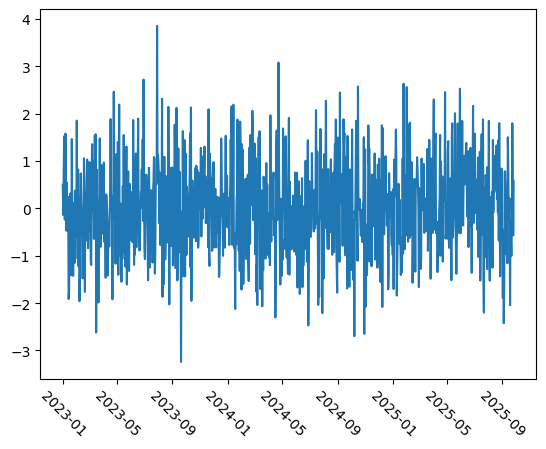

In [5]:
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)
plt.show()

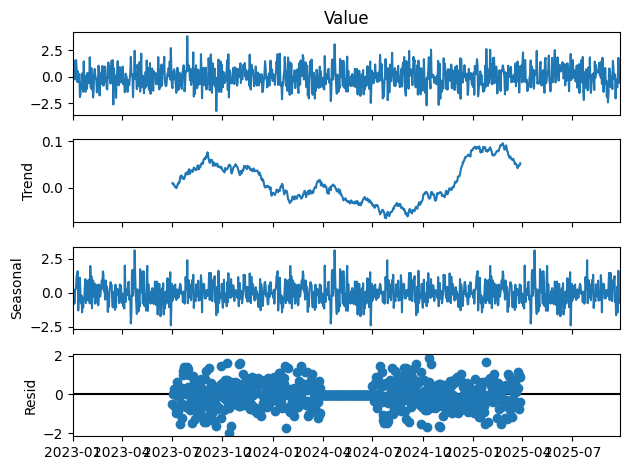

In [6]:
#추세 분석
result = seasonal_decompose(data['Value'], model='additive', period=365)
#model='additive' 매개변수는 계절성과 추세를 덧셈 모델로 분해하겠다는 의미입니다. 다른 옵션으로는 'multiplicative' 모델을 선택할 수도 있습니다.
result.plot()
plt.show()

In [7]:
#2 번째 그래프는 추세 그래프
#3 번째 그래프는 계절성 성분을 보여주는 그래프 period는 365
#4 번째 그래피는 잔차 성분을 보여준다. 추세와 계절성을 제외한 나머지 변동 요소를 나타낸다.

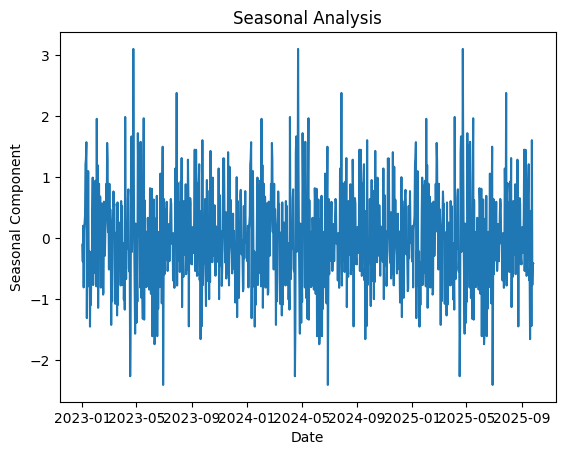

In [8]:
# 계절성 분석
seasonal_component = result.seasonal
plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')
plt.show()

## 시계열의 각 특성에 대한 간단한 실습

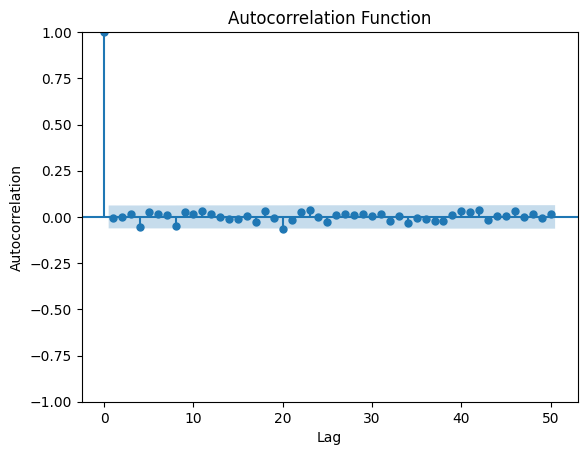

In [9]:
plot_acf(data['Value'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

## 시계열 데이터 구성 요소 3가지(상향, 하향, 평평한 추세) 시각화

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum()

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01   0.496714
1  2023-01-02   0.358450
2  2023-01-03   1.006138
3  2023-01-04   2.529168
4  2023-01-05   2.295015
..        ...        ...
95 2023-04-06 -10.712354
96 2023-04-07 -10.416233
97 2023-04-08 -10.155178
98 2023-04-09 -10.150065
99 2023-04-10 -10.384652

[100 rows x 2 columns]


In [12]:
#상향 추세 시각화

data['Upward_Trend'] = np.linspace(0, 50, len(data))
print(data)

         Date      Value  Upward_Trend
0  2023-01-01   0.496714      0.000000
1  2023-01-02   0.358450      0.505051
2  2023-01-03   1.006138      1.010101
3  2023-01-04   2.529168      1.515152
4  2023-01-05   2.295015      2.020202
..        ...        ...           ...
95 2023-04-06 -10.712354     47.979798
96 2023-04-07 -10.416233     48.484848
97 2023-04-08 -10.155178     48.989899
98 2023-04-09 -10.150065     49.494949
99 2023-04-10 -10.384652     50.000000

[100 rows x 3 columns]


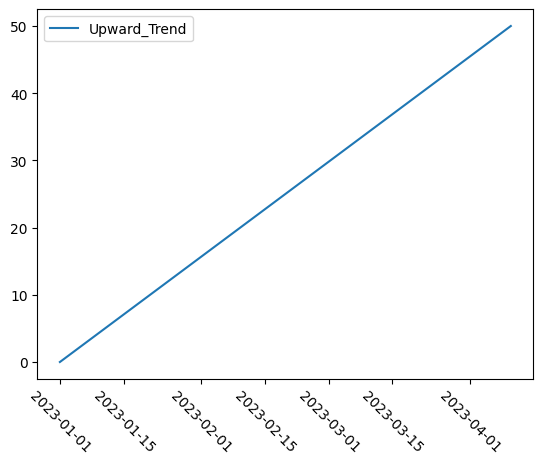

In [13]:
plt.plot(data['Date'], data['Upward_Trend'], label="Upward_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

In [14]:
#하향 추세 시각화

data['Downward_Trend'] = np.linspace(50, 0, len(data))
print(data)

         Date      Value  Upward_Trend  Downward_Trend
0  2023-01-01   0.496714      0.000000       50.000000
1  2023-01-02   0.358450      0.505051       49.494949
2  2023-01-03   1.006138      1.010101       48.989899
3  2023-01-04   2.529168      1.515152       48.484848
4  2023-01-05   2.295015      2.020202       47.979798
..        ...        ...           ...             ...
95 2023-04-06 -10.712354     47.979798        2.020202
96 2023-04-07 -10.416233     48.484848        1.515152
97 2023-04-08 -10.155178     48.989899        1.010101
98 2023-04-09 -10.150065     49.494949        0.505051
99 2023-04-10 -10.384652     50.000000        0.000000

[100 rows x 4 columns]


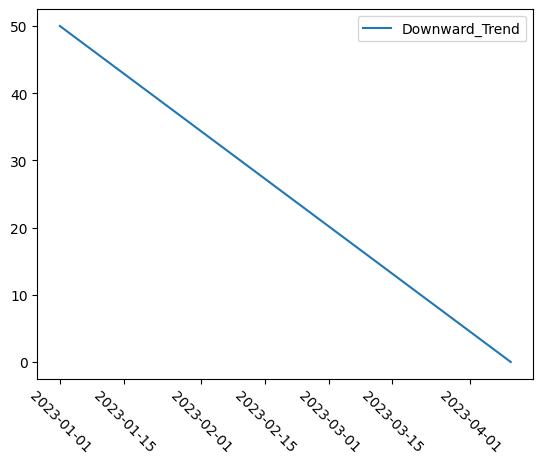

In [15]:
plt.plot(data['Date'], data['Downward_Trend'], label="Downward_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

In [21]:
#평평한 추세 시각화

data['Flat_Trend'] = np.full(len(data), 50)
print(data)

         Date      Value  Upward_Trend  Downward_Trend  Flat_Trend
0  2023-01-01   0.496714      0.000000       50.000000          50
1  2023-01-02   0.358450      0.505051       49.494949          50
2  2023-01-03   1.006138      1.010101       48.989899          50
3  2023-01-04   2.529168      1.515152       48.484848          50
4  2023-01-05   2.295015      2.020202       47.979798          50
..        ...        ...           ...             ...         ...
95 2023-04-06 -10.712354     47.979798        2.020202          50
96 2023-04-07 -10.416233     48.484848        1.515152          50
97 2023-04-08 -10.155178     48.989899        1.010101          50
98 2023-04-09 -10.150065     49.494949        0.505051          50
99 2023-04-10 -10.384652     50.000000        0.000000          50

[100 rows x 5 columns]


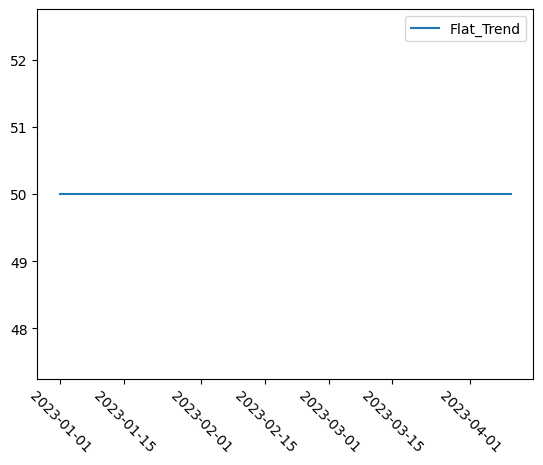

In [23]:
plt.plot(data['Date'], data['Flat_Trend'], label="Flat_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

## 시계열 데이터 탐색 및 시각화

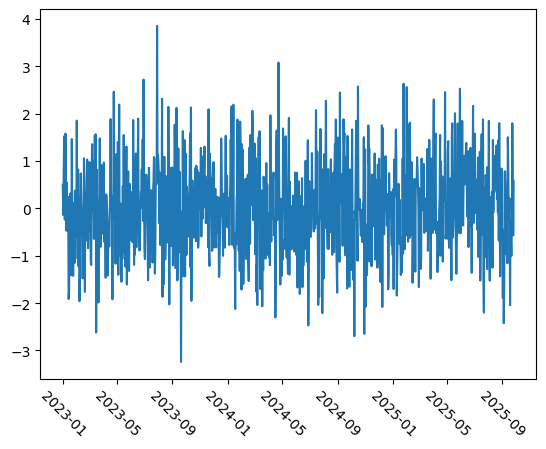

In [39]:
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

pd.set_option('display.max_row', 1000)

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xticks(rotation=-45)
plt.show()

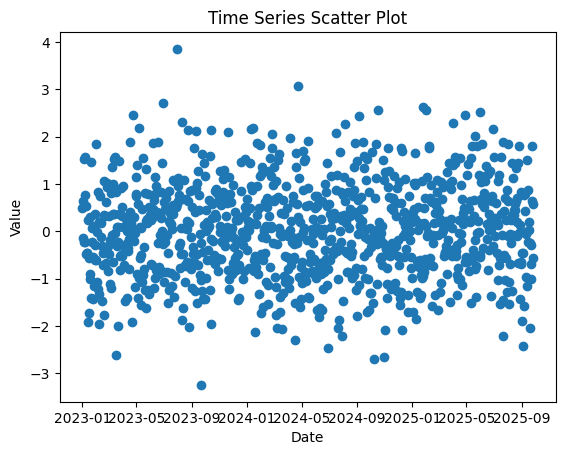

In [32]:
plt.scatter(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Scatter Plot')
plt.show()

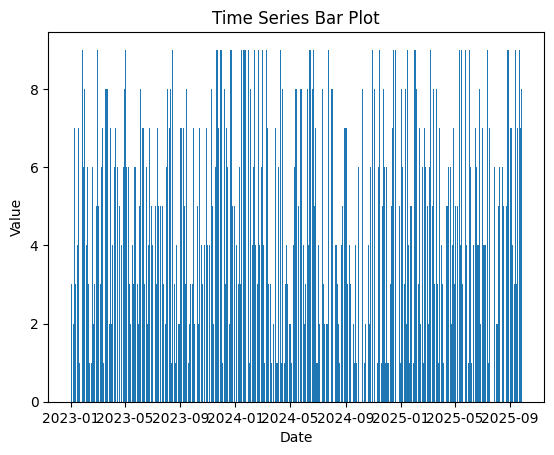

In [36]:
#시계열 데이터의 생성
np.random.seed(41)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randint(0, 10, size=1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#시계열 데이터의 막대 그래프
plt.bar(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Plot')
plt.show()

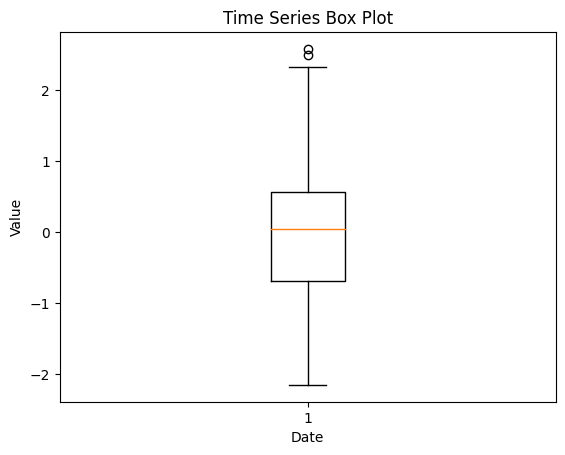

In [65]:
#시계열 데이터의 박스 플롯
plt.boxplot(data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Box Plot')
plt.show()

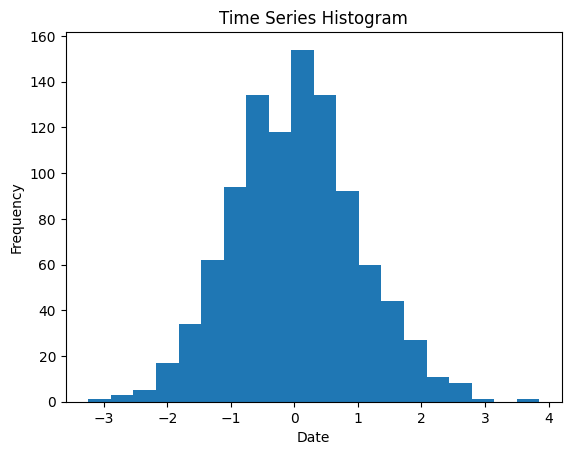

In [40]:
#시계열 데이터의 히스토그램
plt.hist(data['Value'], bins=20)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Histogram')
plt.show()

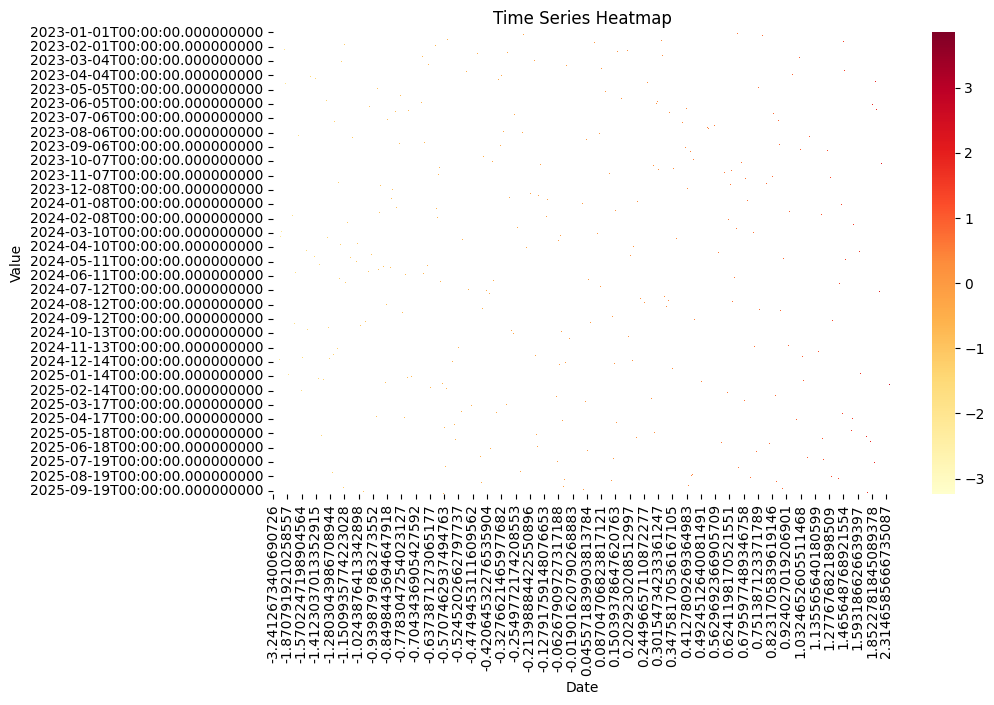

In [42]:
#데이터를 피벗 테이블로 변환
pivot_table = data.pivot(index='Date', columns='Value', values='Value')

#히트맵 시각화
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar=True)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Heatmap')
plt.show()

In [ ]:
"""피벗 테이블은 데이터를 특정 열을 기준으로 그룹화하여 요약하는 방법입니다.

 

예시)
Date      value 
23-01-01    A
23-01-01    B
23-01-02    A
23-01-02    C
23-01-03    B
23-01-03    C

 


피벗 테이블 생성 
          A   B   C 
23-01-01  A   B  NAN
23-01-02  A  NAN  C
23-01-03 NAN  B   C"""

## 시계열 분해 : 추세, 계절성, 주기, 불규칙성 요소 분리하여 시각화

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01  0.125225
1  2023-01-02 -0.429406
2  2023-01-03  0.122298
3  2023-01-04  0.543298
4  2023-01-05  0.048860
5  2023-01-06  0.040592
6  2023-01-07 -0.701992
7  2023-01-08 -0.662901
8  2023-01-09 -1.402605
9  2023-01-10  1.749577
10 2023-01-11 -1.243863
11 2023-01-12 -0.692905
12 2023-01-13 -0.718407
13 2023-01-14  0.894924
14 2023-01-15 -0.294950
15 2023-01-16  1.247742
16 2023-01-17 -0.673491
17 2023-01-18  0.278994
18 2023-01-19 -0.835347
19 2023-01-20  2.145149
20 2023-01-21 -1.187598
21 2023-01-22  0.309821
22 2023-01-23  0.633777
23 2023-01-24  0.413799
24 2023-01-25 -0.185288
25 2023-01-26 -0.129821
26 2023-01-27  0.043811
27 2023-01-28 -0.147002
28 2023-01-29  0.963879
29 2023-01-30  2.210523
30 2023-01-31 -0.557492
31 2023-02-01 -1.369803
32 2023-02-02 -0.088282
33 2023-02-03  2.579709
34 2023-02-04 -0.803675
35 2023-02-05  1.639117
36 2023-02-06  1.677701
37 2023-02-07 -0.553588
38 2023-02-08  0.568983
39 2023-02-09  1.628397
40 2023-02-10 -0

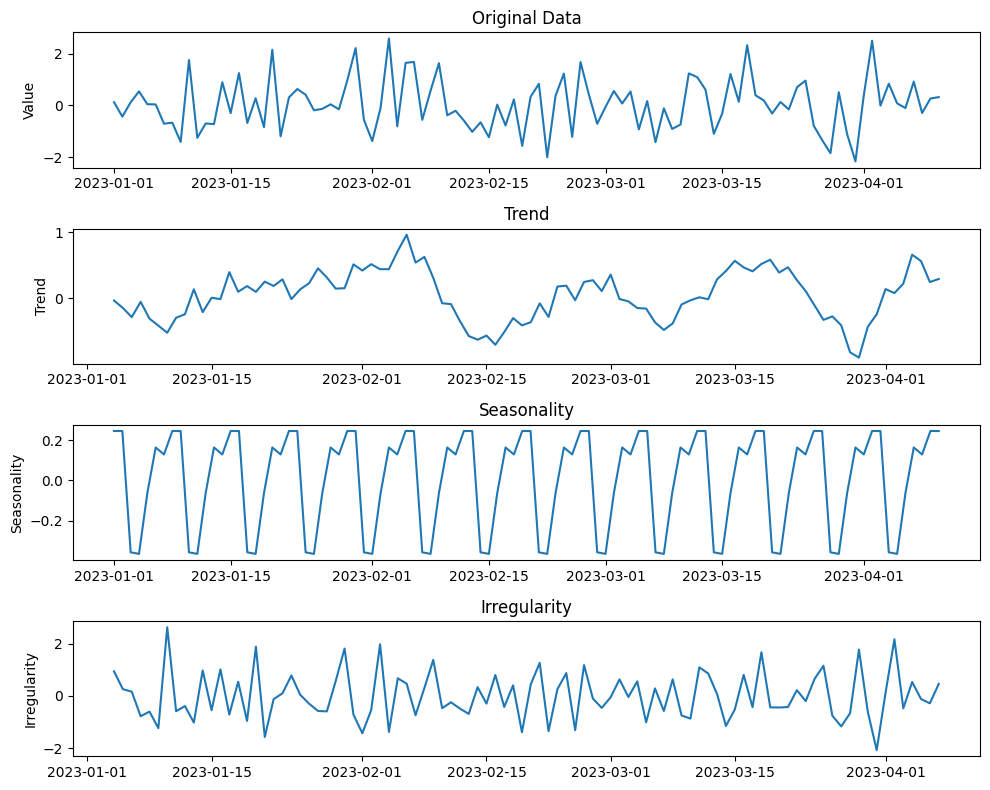

In [64]:
#시계열 분해
result = seasonal_decompose(data['Value'], model='additive', period=7)

#분해 결과 시각화
plt.figure(figsize=(10,8))

#원본 데이터
plt.subplot(4, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.title('Original Data')
plt.ylabel('Value')

#추세(Trend)
plt.subplot(4, 1, 2)
plt.plot(data['Date'], result.trend)
plt.title('Trend')
plt.ylabel('Trend')

#계절성(Seasonality)
plt.subplot(4, 1, 3)
plt.plot(data['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

#불규칙성(Irregularity)
plt.subplot(4, 1, 4)
plt.plot(data['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()